# Analysis Report I -- General information

## Import libraries 

In [148]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

## Importing the Database 

In [87]:
data = pd.read_csv('raw_2021.csv', sep=',')

/opt/Anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,6,7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [88]:
data['real_arr'] = pd.to_datetime(data['real_arr'], format='%Y-%m-%d %H:%M:%S')
data['scheduled_arr'] = pd.to_datetime(data['scheduled_arr'], format='%Y-%m-%d %H:%M:%S')
data['real_arr']
data['real_arr'].dt.day_name()
data['day_of_week'] = data['real_arr'].dt.day_name()

## Reading the data 

In [89]:
data

,company,flight,auth_code,line_type,origin,destination,scheduled_dep,real_dep,scheduled_arr,real_arr,situation,jus_code,day_of_week
0,AZU,2497,0,N,SBMO,SBRF,NaN,NaN,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,NaN,Friday
1,AZU,2493,0,N,SBMK,SBCF,NaN,NaN,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,NaN,Friday
2,AZU,2489,0,N,SBRF,SBGR,NaN,NaN,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,NaN,Friday
3,AZU,2488,0,N,SBGR,SBRF,NaN,NaN,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,NaN,Friday
4,AZU,2487,0,N,SBFL,SBKP,NaN,NaN,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,NaN,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592596,AZU,2503,0,N,SBPL,SBKP,NaN,NaN,2019-06-07 06:35:00,2019-06-07 06:31:00,REALIZADO,NaN,Friday
1592597,AZU,2502,0,N,SBRF,SBSG,NaN,NaN,2019-06-07 15:25:00,2019-06-07 15:05:00,REALIZADO,HD,Friday
1592598,AZU,2500,0,N,SBKP,SBPL,NaN,NaN,2019-06-08 02:35:00,2019-06-08 02:18:00,REALIZADO,HD,Saturday
1592599,AZU,2499,0,N,SBJU,SBKP,NaN,NaN,2019-06-07 05:25:00,2019-06-07 05:09:00,REALIZADO,HD,Friday


## Doing exploratory analysis of the data

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592601 entries, 0 to 1592600
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   company        1592601 non-null  object        
 1   flight         1592601 non-null  object        
 2   auth_code      1591965 non-null  object        
 3   line_type      1591076 non-null  object        
 4   origin         1592601 non-null  object        
 5   destination    1592601 non-null  object        
 6   scheduled_dep  248305 non-null   object        
 7   real_dep       236345 non-null   object        
 8   scheduled_arr  1590127 non-null  datetime64[ns]
 9   real_arr       1546221 non-null  datetime64[ns]
 10  situation      1592601 non-null  object        
 11  jus_code       407030 non-null   object        
 12  day_of_week    1546221 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 158.0+ MB


## Finding the amount of null data in auth_code 

In [91]:
data[data['auth_code'].isnull()].shape[0]

636

## Filling null data in auth_code with 0 

In [92]:
data = data.fillna({'auth_code': 0})

## Check the changed exploratory analysis of the data

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592601 entries, 0 to 1592600
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   company        1592601 non-null  object        
 1   flight         1592601 non-null  object        
 2   auth_code      1592601 non-null  object        
 3   line_type      1591076 non-null  object        
 4   origin         1592601 non-null  object        
 5   destination    1592601 non-null  object        
 6   scheduled_dep  248305 non-null   object        
 7   real_dep       236345 non-null   object        
 8   scheduled_arr  1590127 non-null  datetime64[ns]
 9   real_arr       1546221 non-null  datetime64[ns]
 10  situation      1592601 non-null  object        
 11  jus_code       407030 non-null   object        
 12  day_of_week    1546221 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 158.0+ MB


## General Information about the Database

In [94]:
data_types = pd.DataFrame(data.dtypes, columns=['Data Types'])

In [95]:

data_types.columns.name = 'Variables'

In [96]:
data_types

Variables,Data Types
company,object
flight,object
auth_code,object
line_type,object
origin,object
destination,object
scheduled_dep,object
real_dep,object
scheduled_arr,datetime64[ns]
real_arr,datetime64[ns]


## Type of Line performed for each flight stage

In [97]:
data['line_type'].unique()

array(['N', 'I', 'C', 'G', 'L', 'R', 'X', 'E', 'H', nan], dtype=object)

## Number of data and variables

In [98]:
print('The database has {} register (flight) and {} variables'.format(data.shape[0], data.shape[1]))

The database has 1592601 register (flight) and 13 variables


## Types of flights

<AxesSubplot:>

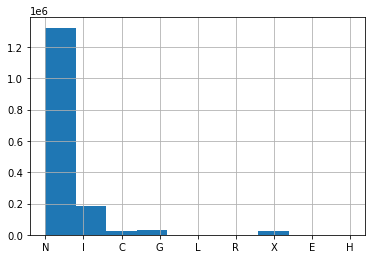

In [99]:
data['line_type'].hist()

# Analysis Report Part II -- Clean data

## Airlines

In [100]:
all_airlines_flight = pd.DataFrame(data[['company','flight','origin','destination','scheduled_arr','real_arr','situation','day_of_week']])

## Number of flights

In [101]:
all_airlines_flight.shape[0]

1592601

In [102]:
all_airlines_flight.head()

,company,flight,origin,destination,scheduled_arr,real_arr,situation,day_of_week
0,AZU,2497,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,Friday
1,AZU,2493,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,Friday
2,AZU,2489,SBRF,SBGR,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,Friday
3,AZU,2488,SBGR,SBRF,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,Friday
4,AZU,2487,SBFL,SBKP,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,Friday


In [103]:
airlines = data.company

## Remove airlines duplicate values

In [104]:
airlines.drop_duplicates(inplace = True)

## Number of airlines flew in Brazil in 2020

In [105]:
print('The number of airlines flew in Brazil in 2020: {} flights.'.format(airlines.shape[0]))

The number of airlines flew in Brazil in 2020: 131 flights.


## Airlines Code

In [106]:
airlines = pd.DataFrame(airlines)

In [107]:
airlines.index

Int64Index([      0,      18,      19,      27,      33,      37,      40,
                 69,     234,     235,
            ...
            1087609, 1087628, 1087648, 1123359, 1123406, 1123434, 1127884,
            1165813, 1165824, 1166435],
           dtype='int64', length=131)

In [108]:
airlines = data.company

In [109]:
airlines.unique()

array(['AZU', 'UAE', 'TTL', 'TPU', 'THY', 'TCV', 'TAP', 'TAM', 'QTR',
       'PTB', 'PAM', 'NRS', 'MWM', 'MPH', 'LTG', 'LPE', 'LCO', 'LAP',
       'LAN', 'UPS', 'UAL', 'LAE', 'KLM', 'KAL', 'IBE', 'GTI', 'GLO',
       'SWR', 'SKU', 'SAA', 'RAM', 'GEC', 'FDX', 'ETH', 'EDW', 'DTA',
       'DSM', 'DLH', 'DAL', 'CMP', 'CLX', 'CCA', 'BOV', 'BAW', 'AZA',
       'AVA', 'AUT', 'ARG', 'AMX', 'AFR', 'AEA', 'ACA', 'AAL', 'AAF',
       'TPA', 'CFG', 'AZP', 'OWT', 'SLM', 'ROI', 'FBZ', 'AZN', 'SUL',
       'JAT', 'SID', 'AUZ', 'ELY', 'OMI', 'RIM', 'CQB', 'EVE', 'LYC',
       'MMZ', 'CKS', 'EAL', 'SAS', 'ADB', 'TVS', 'SWQ', 'GIA', 'MSI',
       'RPB', 'ECO', 'EDR', 'MAA', 'AWC', 'KMF', 'NOS', 'VIV', 'CSB',
       'OLS', 'VVC', 'TIW', 'WAL', 'SVA', 'ACL', 'ARL', 'ARE', 'PLM',
       'AMP', 'AZV', 'JAV', 'TVR', 'SKX', 'VPE', 'PVV', 'AJB', 'ETD',
       'RZO', 'VDA', 'SOO', 'ETR', 'AXY', 'GCA', 'UKL', 'LAU', 'TGY',
       'PVG', 'JAF', 'TFL', 'ATG', 'KRE', 'RUC', 'QCL', 'LNE', 'PUE',
       'JES', 'IPM',

In [110]:
print('The number of flew in Brazil in 2020: {} .'.format(airlines.shape[0]))

The number of flew in Brazil in 2020: 1592601 .


## Analysis Report Part III -- Selecting only brazilians airlines

## Filtering the brazilian airlines that flew in Brazil

In [111]:
brazilian_airlines = ['AZU', 'GLO', 'TAM', 'PTB']

In [112]:
selection = data['company'].isin(brazilian_airlines)

In [113]:
data_brazilian_airlines = data[selection]

## Brazilian airlines

In [114]:
data_brazilian_airlines['company'].unique()

array(['AZU', 'TAM', 'PTB', 'GLO'], dtype=object)

In [115]:
domestic_flights = data_brazilian_airlines[data_brazilian_airlines['line_type'] == 'N']

In [116]:
domestic_flights.head()

,company,flight,auth_code,line_type,origin,destination,scheduled_dep,real_dep,scheduled_arr,real_arr,situation,jus_code,day_of_week
0,AZU,2497,0,N,SBMO,SBRF,NaN,NaN,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,NaN,Friday
1,AZU,2493,0,N,SBMK,SBCF,NaN,NaN,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,NaN,Friday
2,AZU,2489,0,N,SBRF,SBGR,NaN,NaN,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,NaN,Friday
3,AZU,2488,0,N,SBGR,SBRF,NaN,NaN,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,NaN,Friday
4,AZU,2487,0,N,SBFL,SBKP,NaN,NaN,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,NaN,Friday


In [117]:
domestic_flights['company'].unique()

array(['AZU', 'TAM', 'PTB', 'GLO'], dtype=object)

## Checking line types 

In [118]:
list(domestic_flights['line_type'].drop_duplicates())

['N']

## Analysis Report Part IV -- Flights confirmed and canceled

In [119]:
domestic_flights = pd.DataFrame(domestic_flights[['company','flight','origin','destination','scheduled_arr','real_arr','situation','day_of_week']])

In [120]:
domestic_flights.head(10)

,company,flight,origin,destination,scheduled_arr,real_arr,situation,day_of_week
0,AZU,2497,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,Friday
1,AZU,2493,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,Friday
2,AZU,2489,SBRF,SBGR,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,Friday
3,AZU,2488,SBGR,SBRF,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,Friday
4,AZU,2487,SBFL,SBKP,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,Friday
5,AZU,2485,SBPK,SBPA,2019-06-07 13:55:00,2019-06-07 13:55:00,REALIZADO,Friday
6,AZU,2483,SBCF,SBKP,2019-06-07 13:45:00,2019-06-07 13:40:00,REALIZADO,Friday
7,AZU,2482,SBKP,SBCF,2019-06-07 20:10:00,2019-06-07 20:10:00,REALIZADO,Friday
8,AZU,2480,SBGR,SBCY,2019-06-07 15:05:00,2019-06-07 15:03:00,REALIZADO,Friday
9,AZU,2479,SBLO,SBCT,2019-06-07 20:35:00,2019-06-07 20:29:00,REALIZADO,Friday



## Checking flights situation

In [121]:
selecao = (domestic_flights['situation'] == 'REALIZADO') | (domestic_flights['situation'] == 'CANCELADO')


In [122]:

domestic_flights = domestic_flights[selecao]

In [123]:
domestic_flights.head()

,company,flight,origin,destination,scheduled_arr,real_arr,situation,day_of_week
0,AZU,2497,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,Friday
1,AZU,2493,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,Friday
2,AZU,2489,SBRF,SBGR,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,Friday
3,AZU,2488,SBGR,SBRF,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,Friday
4,AZU,2487,SBFL,SBKP,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,Friday


<AxesSubplot:>

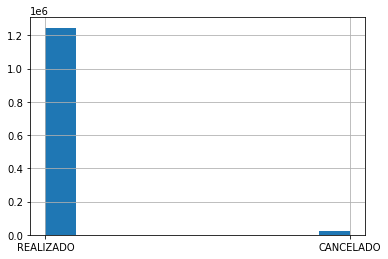

In [124]:
domestic_flights['situation'].hist()

In [125]:
domestic_flights['company'].unique()

array(['AZU', 'TAM', 'PTB', 'GLO'], dtype=object)

## Number of flights confirmed

In [126]:
n_confirmed = domestic_flights[domestic_flights['situation'] == 'REALIZADO'].shape[0]
n_confirmed

1245367

## Number of flights canceled

In [127]:
n_canceled = domestic_flights[domestic_flights['situation'] == 'CANCELADO'].shape[0]
n_canceled

20558

## Analysis Report Part V -- Flights confirmed and canceled by airlines

## Number of flights confirmed by airline

In [128]:
n_confirmed = domestic_flights[domestic_flights['situation'] == 'REALIZADO']
flight_confirmed = pd.DataFrame(n_confirmed[['company','situation']])
flight_confirmed

,company,situation
0,AZU,REALIZADO
1,AZU,REALIZADO
2,AZU,REALIZADO
3,AZU,REALIZADO
4,AZU,REALIZADO
...,...,...
1592596,AZU,REALIZADO
1592597,AZU,REALIZADO
1592598,AZU,REALIZADO
1592599,AZU,REALIZADO


In [129]:
flight_confirmed = flight_confirmed.groupby('company').count()

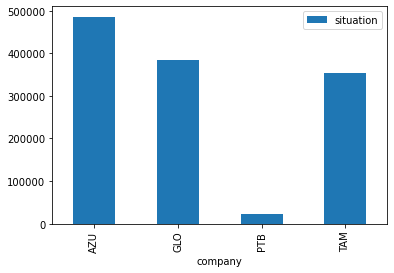

In [130]:
flight_confirmed.plot(kind='bar')
plt.show()

## Number of flights canceled by airline

In [131]:
n_canceled = domestic_flights[domestic_flights['situation'] == 'CANCELADO']
flight_candeled = pd.DataFrame(n_canceled[['company','situation']])

In [132]:
flight_candeled = flight_candeled.groupby('company').count()

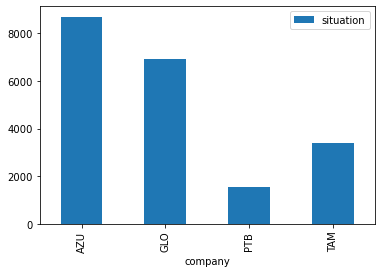

In [133]:
flight_candeled.plot(kind='bar')
plt.show()

## Analysis Report Part V

In [134]:
domestic_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265925 entries, 0 to 1592600
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   company        1265925 non-null  object        
 1   flight         1265925 non-null  object        
 2   origin         1265925 non-null  object        
 3   destination    1265925 non-null  object        
 4   scheduled_arr  1265786 non-null  datetime64[ns]
 5   real_arr       1243089 non-null  datetime64[ns]
 6   situation      1265925 non-null  object        
 7   day_of_week    1243089 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 86.9+ MB


In [135]:
domestic_flights

,company,flight,origin,destination,scheduled_arr,real_arr,situation,day_of_week
0,AZU,2497,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,Friday
1,AZU,2493,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,Friday
2,AZU,2489,SBRF,SBGR,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,Friday
3,AZU,2488,SBGR,SBRF,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,Friday
4,AZU,2487,SBFL,SBKP,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,Friday
...,...,...,...,...,...,...,...,...
1592596,AZU,2503,SBPL,SBKP,2019-06-07 06:35:00,2019-06-07 06:31:00,REALIZADO,Friday
1592597,AZU,2502,SBRF,SBSG,2019-06-07 15:25:00,2019-06-07 15:05:00,REALIZADO,Friday
1592598,AZU,2500,SBKP,SBPL,2019-06-08 02:35:00,2019-06-08 02:18:00,REALIZADO,Saturday
1592599,AZU,2499,SBJU,SBKP,2019-06-07 05:25:00,2019-06-07 05:09:00,REALIZADO,Friday


In [136]:
domestic_flights['real_arr'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1592596    False
1592597    False
1592598    False
1592599    False
1592600    False
Name: real_arr, Length: 1265925, dtype: bool

In [137]:
domestic_flights[domestic_flights['scheduled_arr'].isnull()]

,company,flight,origin,destination,scheduled_arr,real_arr,situation,day_of_week
539629,TAM,9007,SBGR,SBFZ,NaT,2020-04-11 13:07:00,REALIZADO,Saturday
539931,TAM,9008,SBFZ,SBGR,NaT,2020-04-11 17:47:00,REALIZADO,Saturday
540082,TAM,9008,SBGR,SBMO,NaT,2020-04-12 16:44:00,REALIZADO,Sunday
541362,TAM,9008,SBMO,SBRF,NaT,2020-04-12 18:11:00,REALIZADO,Sunday
541815,TAM,9009,SBRF,SBGR,NaT,2020-04-12 22:21:00,REALIZADO,Sunday
...,...,...,...,...,...,...,...,...
801200,AZU,2220,SBKP,SBPA,NaT,2020-04-14 22:34:00,REALIZADO,Tuesday
801201,AZU,2220,SBKP,SBPA,NaT,2020-04-27 22:26:00,REALIZADO,Monday
801741,GLO,2014,SBGR,SBSV,NaT,2020-04-18 13:52:00,REALIZADO,Saturday
801742,GLO,2014,SBSV,SBAR,NaT,2020-04-18 15:34:00,REALIZADO,Saturday


In [138]:
domestic_flights[domestic_flights['real_arr'].isnull()]

,company,flight,origin,destination,scheduled_arr,real_arr,situation,day_of_week
203,TAM,4606,SBSL,SBGR,2019-06-08 20:00:00,NaT,CANCELADO,NaN
375,AZU,4299,SBNF,SBRJ,2019-07-07 15:45:00,NaT,CANCELADO,NaN
451,AZU,4298,SBRJ,SBNF,2019-07-07 13:50:00,NaT,CANCELADO,NaN
527,TAM,3398,SBGR,SBAR,2019-07-10 02:30:00,NaT,CANCELADO,NaN
667,TAM,3818,SBSP,SBBR,2019-06-08 08:30:00,NaT,CANCELADO,NaN
...,...,...,...,...,...,...,...,...
1591862,AZU,5251,SBPV,SBCF,2019-06-07 05:35:00,NaT,CANCELADO,NaN
1592144,AZU,4166,SBCY,SBPV,2019-06-07 15:30:00,NaT,CANCELADO,NaN
1592145,AZU,4166,SBKP,SBCY,2019-06-07 12:55:00,NaT,CANCELADO,NaN
1592150,GLO,1165,SBLO,SBSP,2019-07-04 14:40:00,NaT,CANCELADO,NaN


In [139]:
domestic_flights.dropna(subset=['scheduled_arr'], inplace=True)

In [140]:
domestic_flights.dropna(subset=['real_arr'], inplace=True)

In [141]:
domestic_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242950 entries, 0 to 1592600
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   company        1242950 non-null  object        
 1   flight         1242950 non-null  object        
 2   origin         1242950 non-null  object        
 3   destination    1242950 non-null  object        
 4   scheduled_arr  1242950 non-null  datetime64[ns]
 5   real_arr       1242950 non-null  datetime64[ns]
 6   situation      1242950 non-null  object        
 7   day_of_week    1242950 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 85.3+ MB


## Analysis Report Part VI

In [142]:
domestic_flights

,company,flight,origin,destination,scheduled_arr,real_arr,situation,day_of_week
0,AZU,2497,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,Friday
1,AZU,2493,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,Friday
2,AZU,2489,SBRF,SBGR,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,Friday
3,AZU,2488,SBGR,SBRF,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,Friday
4,AZU,2487,SBFL,SBKP,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,Friday
...,...,...,...,...,...,...,...,...
1592596,AZU,2503,SBPL,SBKP,2019-06-07 06:35:00,2019-06-07 06:31:00,REALIZADO,Friday
1592597,AZU,2502,SBRF,SBSG,2019-06-07 15:25:00,2019-06-07 15:05:00,REALIZADO,Friday
1592598,AZU,2500,SBKP,SBPL,2019-06-08 02:35:00,2019-06-08 02:18:00,REALIZADO,Saturday
1592599,AZU,2499,SBJU,SBKP,2019-06-07 05:25:00,2019-06-07 05:09:00,REALIZADO,Friday


In [143]:
domestic_flights['time_diff'] = domestic_flights['scheduled_arr'] - domestic_flights['real_arr']

In [144]:
domestic_flights = pd.DataFrame(domestic_flights[['company','flight','origin','destination','scheduled_arr','real_arr','situation','time_diff','day_of_week']])

In [145]:
domestic_flights

,company,flight,origin,destination,scheduled_arr,real_arr,situation,time_diff,day_of_week
0,AZU,2497,SBMO,SBRF,2019-06-07 21:50:00,2019-06-07 21:39:00,REALIZADO,0 days 00:11:00,Friday
1,AZU,2493,SBMK,SBCF,2019-06-07 20:30:00,2019-06-07 20:30:00,REALIZADO,0 days 00:00:00,Friday
2,AZU,2489,SBRF,SBGR,2019-06-07 23:35:00,2019-06-07 23:35:00,REALIZADO,0 days 00:00:00,Friday
3,AZU,2488,SBGR,SBRF,2019-06-07 08:20:00,2019-06-07 08:11:00,REALIZADO,0 days 00:09:00,Friday
4,AZU,2487,SBFL,SBKP,2019-06-07 17:45:00,2019-06-07 17:45:00,REALIZADO,0 days 00:00:00,Friday
...,...,...,...,...,...,...,...,...,...
1592596,AZU,2503,SBPL,SBKP,2019-06-07 06:35:00,2019-06-07 06:31:00,REALIZADO,0 days 00:04:00,Friday
1592597,AZU,2502,SBRF,SBSG,2019-06-07 15:25:00,2019-06-07 15:05:00,REALIZADO,0 days 00:20:00,Friday
1592598,AZU,2500,SBKP,SBPL,2019-06-08 02:35:00,2019-06-08 02:18:00,REALIZADO,0 days 00:17:00,Saturday
1592599,AZU,2499,SBJU,SBKP,2019-06-07 05:25:00,2019-06-07 05:09:00,REALIZADO,0 days 00:16:00,Friday


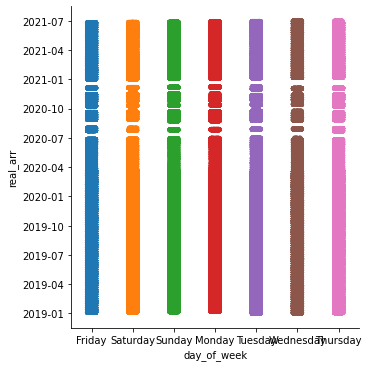

In [152]:
sns.catplot(x= 'day_of_week', y= 'real_arr', data=domestic_flights)